# Model to Determine FSC = 0 or FSC = 1 from ICESat-2 Data

## Sodankyla

### Creation of Pandas Dataframe

In [2]:
from scripts.FSC_dataframe import *

%matplotlib ipympl

dirpath = '../data/sodankyla_cam/'
csvpath = 'snow_cam_details.csv'

df, df_pure = FSC_dataframe(dirpath, csvpath)

Beam 6 in file 1 has been skipped because of no data.
Beam 4 in file 10 has been skipped because of no data.
Beam 6 in file 16 has been skipped because of no data.


### Statistical Glance

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23 entries, 0 to 22
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Camera          23 non-null     object  
 1   File Number     23 non-null     float64 
 2   Date            23 non-null     object  
 3   FSC             23 non-null     category
 4   Tree Snow       23 non-null     category
 5   Joint Snow      23 non-null     category
 6   pvpg            23 non-null     float64 
 7   mean_Eg_strong  23 non-null     float32 
 8   mean_Eg_weak    22 non-null     float64 
 9   mean_Ev_strong  23 non-null     float32 
 10  mean_Ev_weak    22 non-null     float64 
 11  msw_flag        23 non-null     float64 
 12  night_flag      23 non-null     float64 
 13  asr             23 non-null     float64 
dtypes: category(3), float32(2), float64(7), object(2)
memory usage: 2.4+ KB


In [9]:
df.head()

,Camera,File Number,Date,FSC,Tree Snow,Joint Snow,pvpg,mean_Eg_strong,mean_Eg_weak,mean_Ev_strong,mean_Ev_weak,msw_flag,night_flag,asr
0,Sodankyla Intensive Observation Area,0.0,12/01/2019,1.0,0.0,1.0,0.342716,4.024636,1.223947,0.432143,0.289866,1.000000,1.0,0.312751
1,Sodankyla Intensive Observation Area,1.0,24/01/2019,1.0,1.0,2.0,1.528425,0.277724,0.183511,0.411869,0.289517,3.000000,0.0,0.083229
2,Sodankyla Intensive Observation Area,2.0,27/03/2019,1.0,0.0,1.0,0.653111,0.260734,NaN,0.126290,NaN,2.181818,0.0,0.017572
3,Sodankyla Intensive Observation Area,3.0,13/04/2019,1.0,0.0,1.0,0.803576,3.063679,0.813262,0.220803,0.341194,1.000000,0.0,0.298695
4,Sodankyla Intensive Observation Area,4.0,25/04/2019,1.0,0.0,1.0,0.140264,3.112622,0.663740,0.350935,0.189513,0.000000,0.0,0.329401


In [8]:
df.describe()

,File Number,pvpg,mean_Eg_strong,mean_Eg_weak,mean_Ev_strong,mean_Ev_weak,msw_flag,night_flag,asr
count,23.000000,23.000000,23.000000,22.000000,23.000000,22.000000,23.000000,23.000000,23.000000
mean,16.391304,0.785563,2.329018,0.715239,0.567271,0.328744,0.916740,0.391304,0.231732
std,10.882593,0.347100,1.629436,0.459035,0.341207,0.122649,0.996288,0.499011,0.168069
min,0.000000,0.218932,0.260734,0.090498,0.126290,0.189513,0.000000,0.000000,0.017572
25%,6.500000,0.526784,0.998561,0.251957,0.389122,0.252141,0.000000,0.000000,0.096824
50%,17.000000,0.770523,2.166465,0.640000,0.501309,0.292569,1.000000,0.000000,0.194624
75%,24.500000,1.037282,3.837193,1.133937,0.659664,0.365419,1.456522,1.000000,0.321076
max,35.000000,1.312406,5.823964,1.506051,1.815182,0.724196,3.000000,1.000000,0.563207


<Axes: >

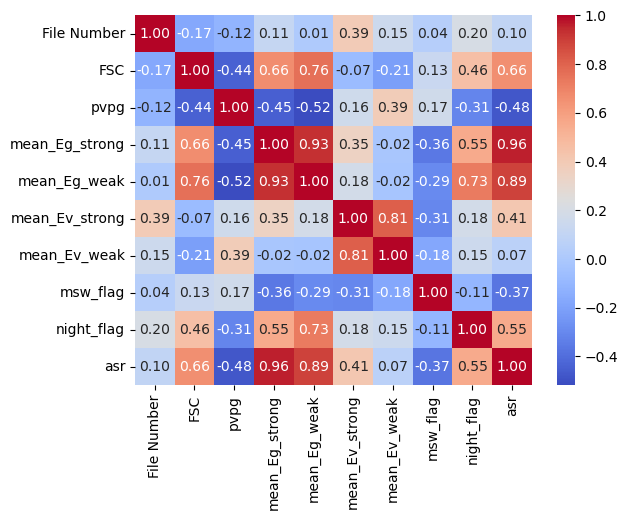

In [9]:
# Correlation heatmap
sns.heatmap(df_pure.drop(['Joint Snow','Tree Snow'],axis=1).corr(), annot=True, cmap="coolwarm", fmt=".2f")

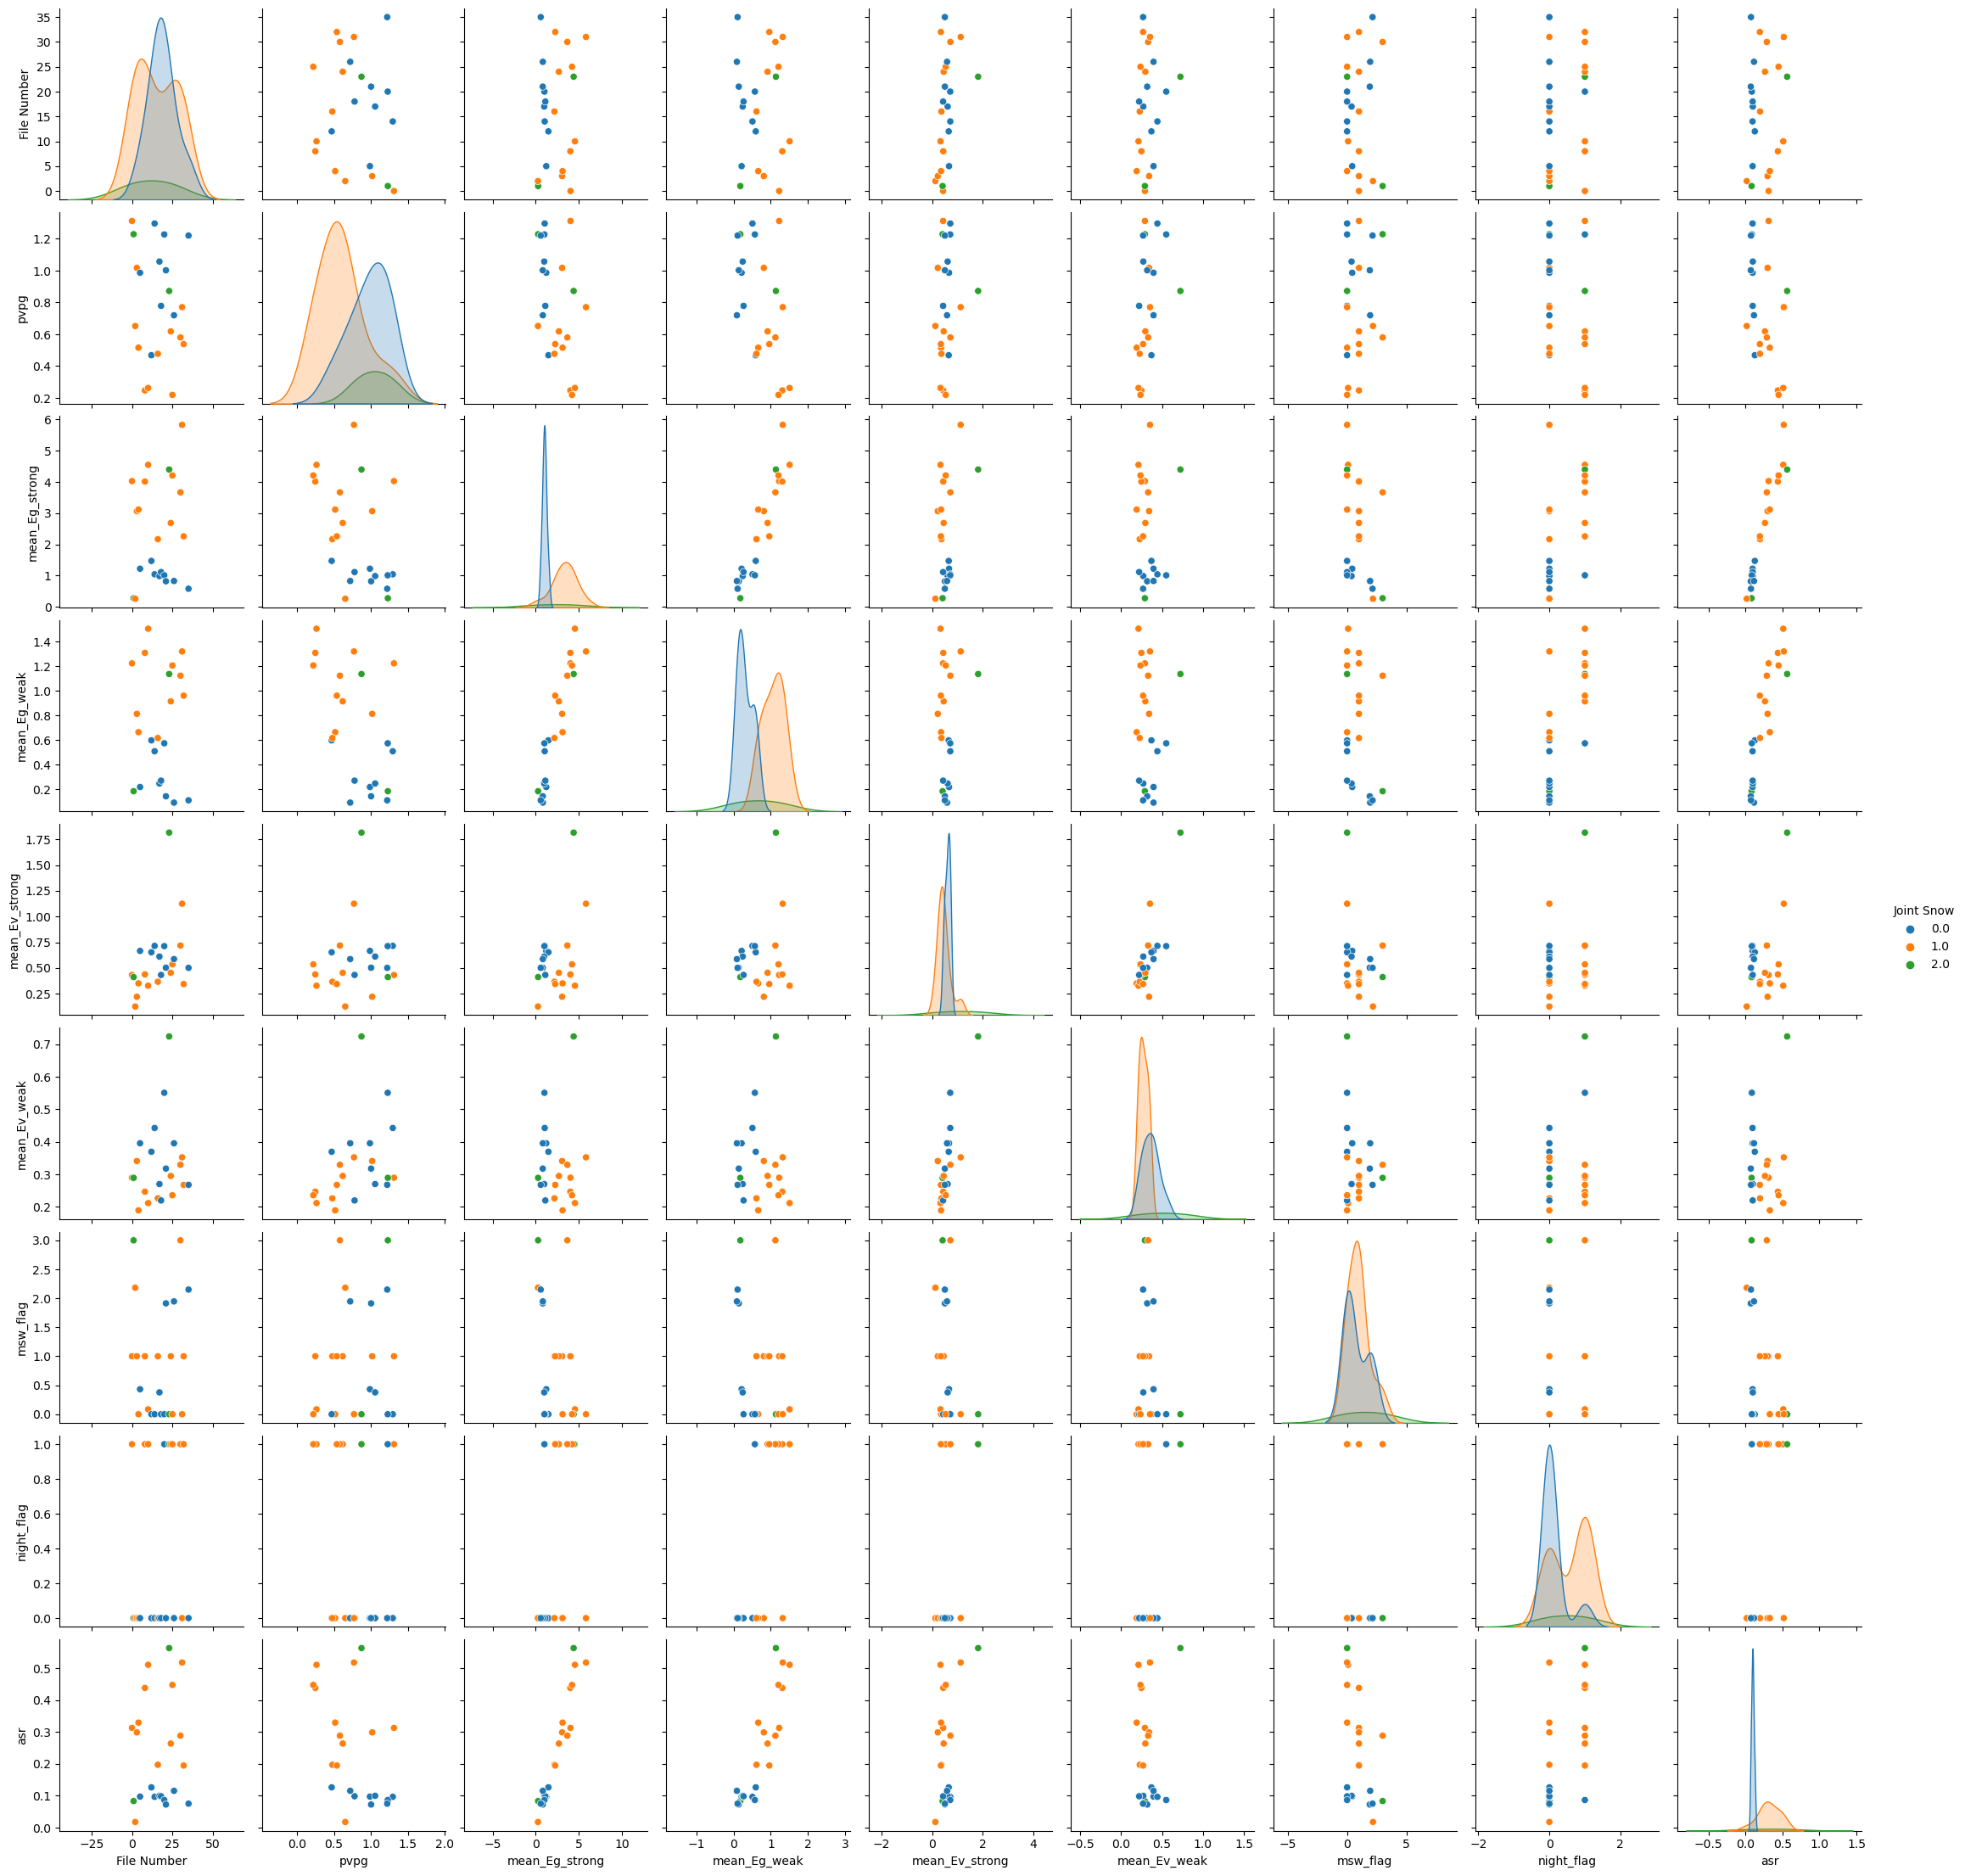

In [9]:
# Pairplot
hue = 'Joint Snow'

sns.pairplot(df_pure, diag_kind='kde', hue=hue)

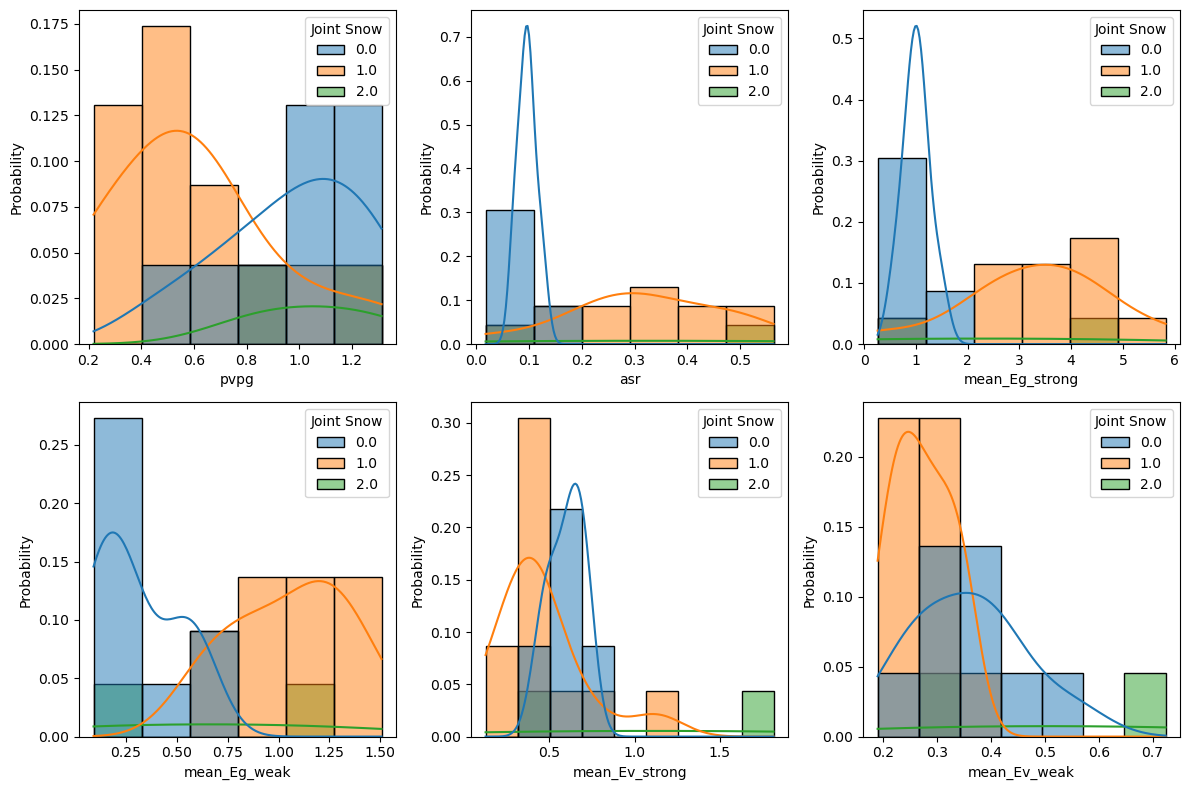

In [10]:
# Distribution Plots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

hue = 'Joint Snow'
stat = 'probability'
f = ['pvpg','asr','mean_Eg_strong','mean_Eg_weak','mean_Ev_strong','mean_Ev_weak']
i = 0
j = 0

for x in f:
    sns.histplot(df, x=x, hue=hue, kde=True, stat=stat,ax=axes[i % 2, j % 3])
    j += 1
    if j == 3:
        i += 1

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

C:\Users\s1803229\AppData\Local\miniforge-pypy3\envs\snow_env\lib\site-packages\pandas\io\formats\format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
C:\Users\s1803229\AppData\Local\miniforge-pypy3\envs\snow_env\lib\site-packages\pandas\io\formats\format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
C:\Users\s1803229\AppData\Local\miniforge-pypy3\envs\snow_env\lib\site-packages\pandas\io\formats\format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
C:\Users\s1803229\AppData\Local\miniforge-pypy3\envs\snow_env\lib\site-packages\pandas\io\formats\format.py:1429: FutureWarning: Index.ravel returning ndarray is depreca

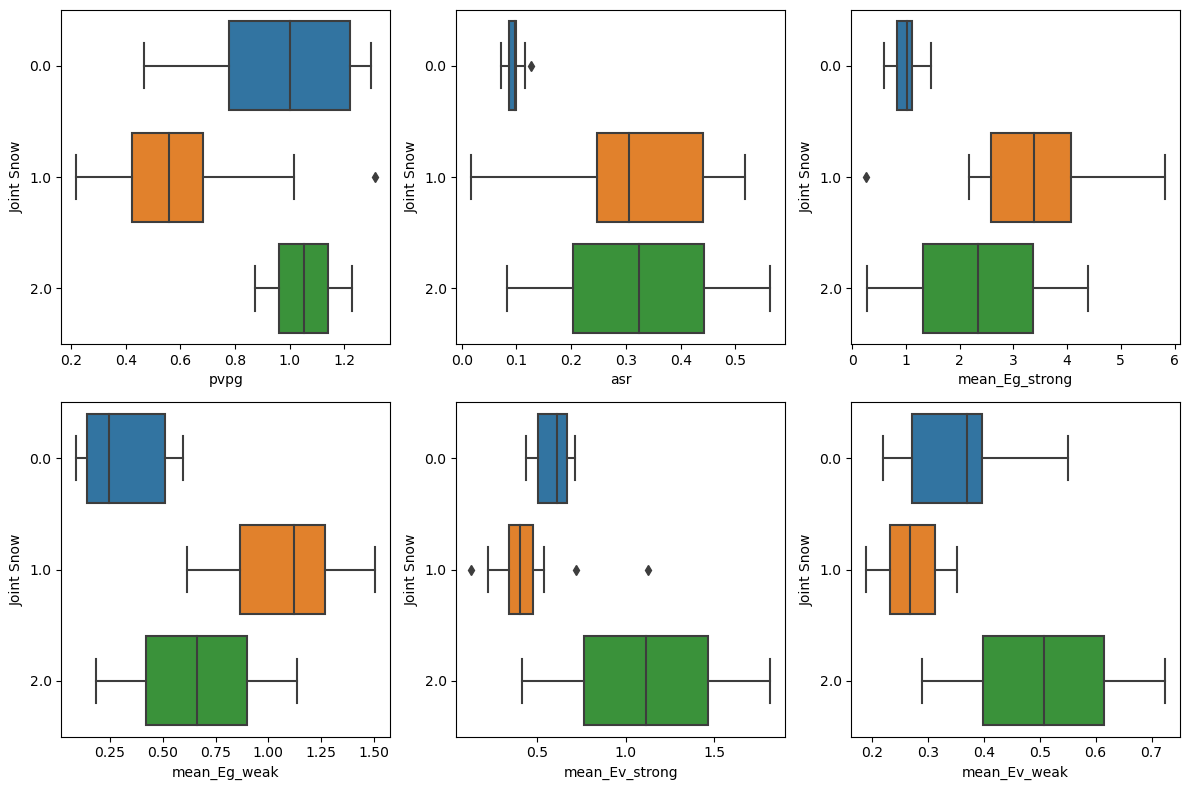

In [20]:
# Violin plots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

hue = 'Joint Snow'

# Distribution plots
sns.boxplot(df, x='pvpg', y=hue, ax=axes[0, 0])
sns.boxplot(df, x='asr', y=hue, ax=axes[0, 1])
sns.boxplot(df, x='mean_Eg_strong', y=hue, ax=axes[0, 2])
sns.boxplot(df, x='mean_Eg_weak', y=hue, ax=axes[1, 0])
sns.boxplot(df, x='mean_Ev_strong', y=hue, ax=axes[1, 1])
sns.boxplot(df, x='mean_Ev_weak', y=hue, ax=axes[1, 2])

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

C:\Users\s1803229\AppData\Local\miniforge-pypy3\envs\snow_env\lib\site-packages\pandas\io\formats\format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
C:\Users\s1803229\AppData\Local\miniforge-pypy3\envs\snow_env\lib\site-packages\pandas\io\formats\format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
C:\Users\s1803229\AppData\Local\miniforge-pypy3\envs\snow_env\lib\site-packages\pandas\io\formats\format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
C:\Users\s1803229\AppData\Local\miniforge-pypy3\envs\snow_env\lib\site-packages\pandas\io\formats\format.py:1429: FutureWarning: Index.ravel returning ndarray is depreca

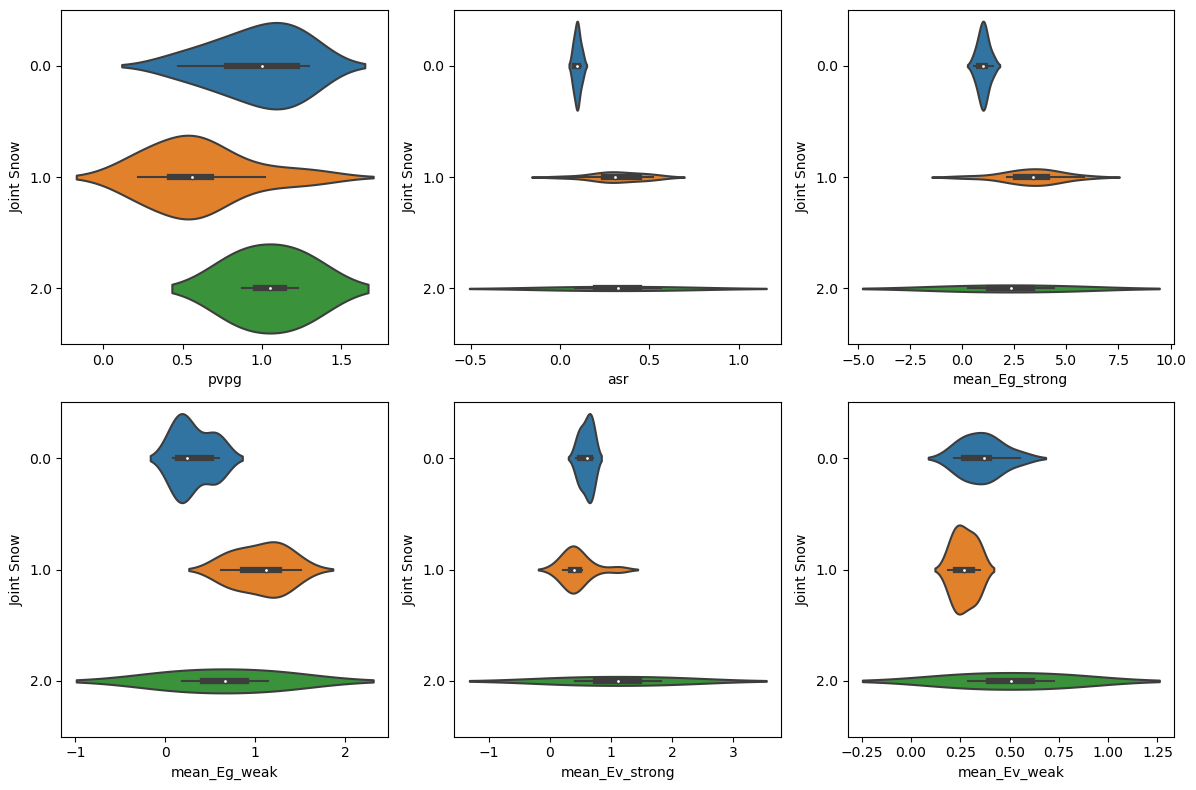

In [19]:
# Violin plots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

hue = 'Joint Snow'

# Distribution plots
sns.violinplot(df, x='pvpg', y=hue, ax=axes[0, 0])
sns.violinplot(df, x='asr', y=hue, ax=axes[0, 1])
sns.violinplot(df, x='mean_Eg_strong', y=hue, ax=axes[0, 2])
sns.violinplot(df, x='mean_Eg_weak', y=hue, ax=axes[1, 0])
sns.violinplot(df, x='mean_Ev_strong', y=hue, ax=axes[1, 1])
sns.violinplot(df, x='mean_Ev_weak', y=hue, ax=axes[1, 2])

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

## Kenttarova

In [ ]:
# from scripts.FSC_dataframe import *

# %matplotlib ipympl

# dirpath = '../data/kenttarova_cam/'
# csvpath = 'snow_cam_details.csv'

# df, df_pure = FSC_dataframe(dirpath, csvpath)